# Question 5  

Photoresist is a light-sensitive material applied to semiconductor wafers so that the circuit patter can be imaged on to the wafer. After application, the coated wafers are baked to remove the solvent in the photoresist mixture and to harden the resist. Here are measurements of photoresist thinkness (in $K \dot{A}$) for eight wafers baked at two different temperatures. Assume that all of the 16 runs were made in random order. Note: a wafer cannot be baked twice.

95 degrees,11.176,7.089,8.097,11.739,11.291,10.759,6.467,8.315
100 degrees,5.623,6.748,7.461,7.015,8.133,7.418,3.772,8.963


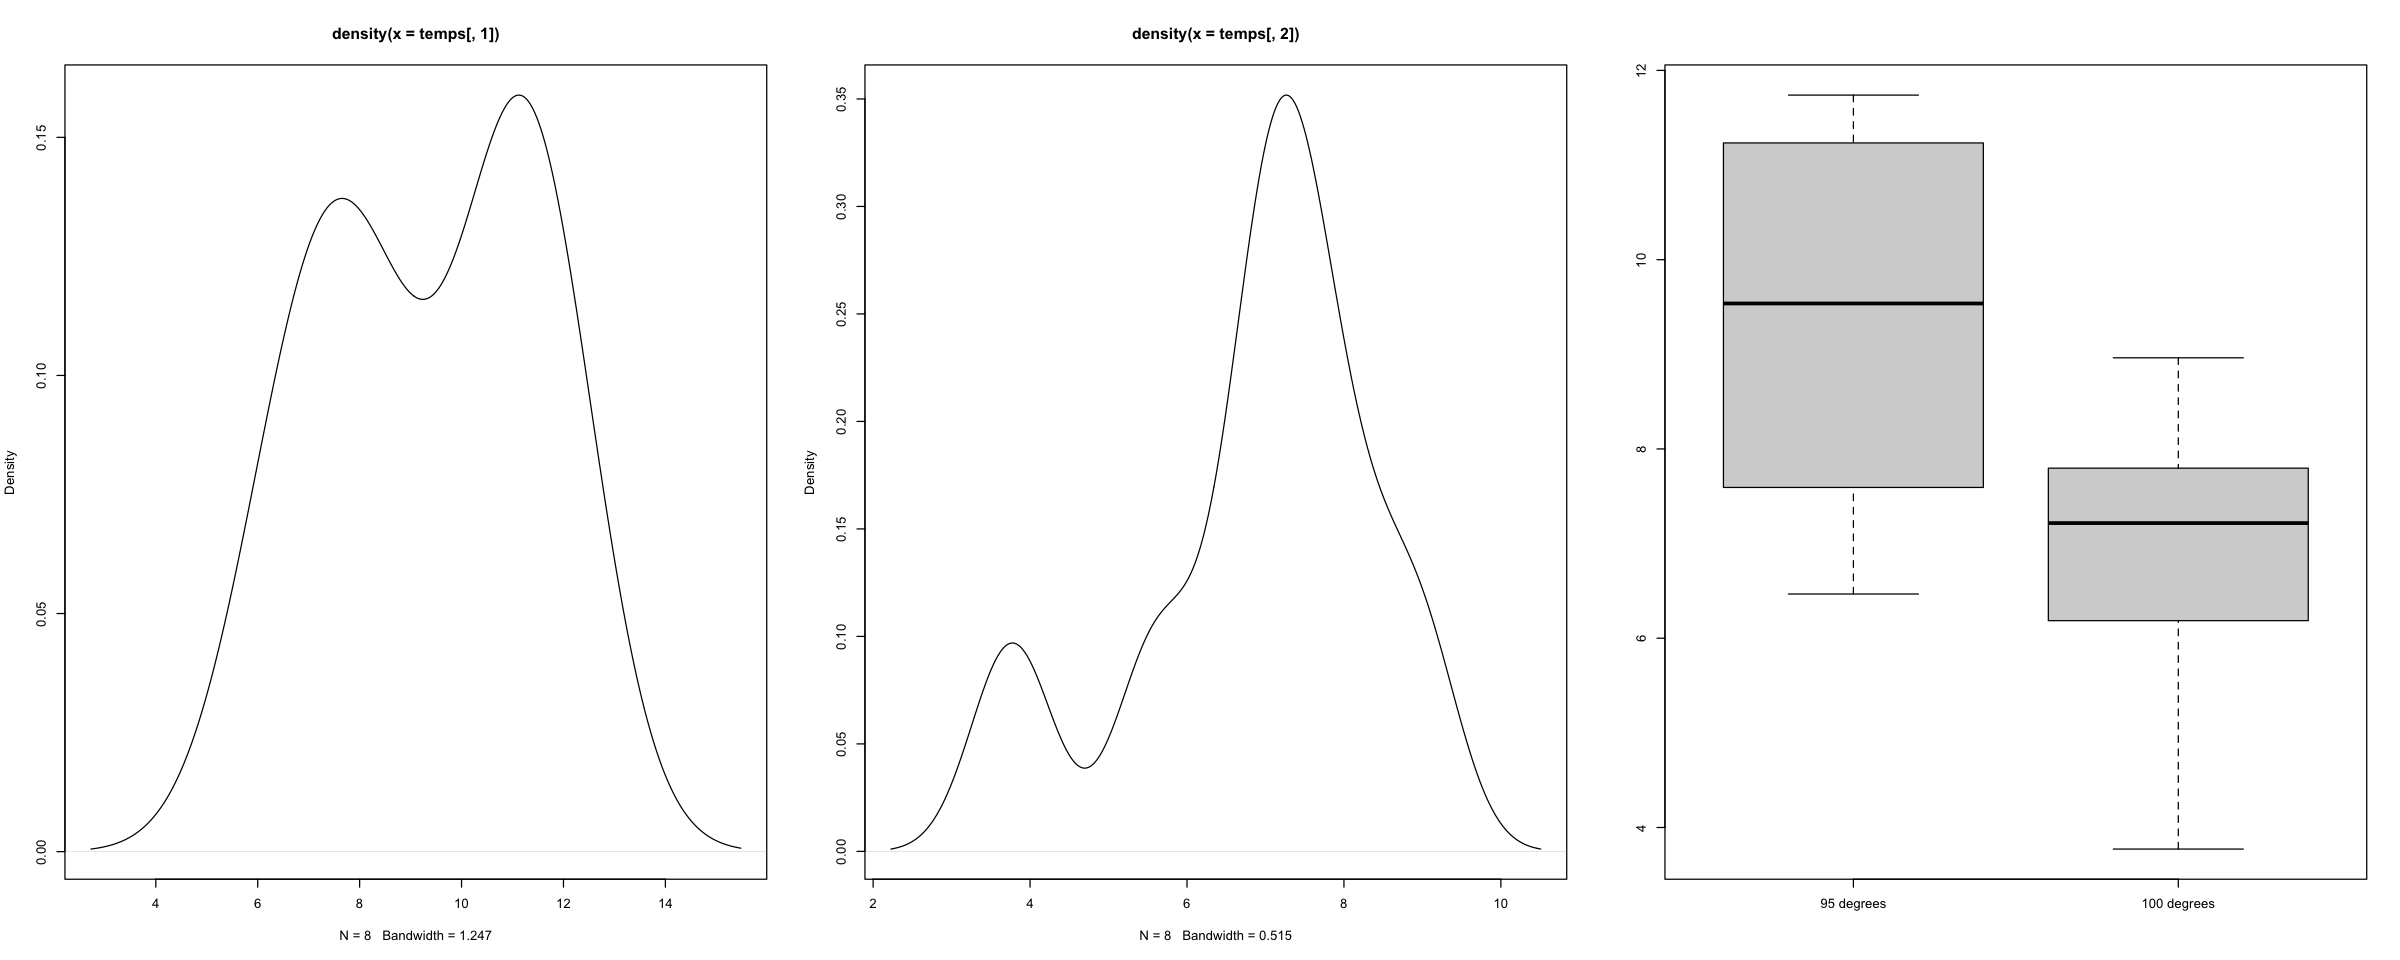

In [11]:
temps <- matrix(c(
    11.176, 07.089, 08.097, 11.739, 11.291, 10.759, 06.467, 08.315,
    05.623, 06.748, 07.461, 07.015, 08.133, 07.418, 03.772, 08.963
), ncol = 2)
colnames(temps) <- (c("95 degrees", "100 degrees"))
t(temps)
par(mfrow = c(1, 3))
options(repr.plot.width = 20, repr.plot.height = 8)
plot(density(temps[,1]))
plot(density(temps[,2]))
boxplot(temps)

**(a)** Is there evidence to support the claim that the higher baking temperature results in wafers with a lower mean photoresis thickness? Use $\alpha = 0.05$ and justify your answer

First we should test if the variances are different so we know what assumptions we can make when we do our hypothesis test. 

In [5]:
var.test(temps[,1], temps[,2])


	F test to compare two variances

data:  temps[, 1] and temps[, 2]
F = 1.7326, num df = 7, denom df = 7, p-value = 0.4855
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3468649 8.6539742
sample estimates:
ratio of variances 
          1.732559 


With a p-value of $0.4855$ we do not have sufficient evidence that the variances between the samples are different. We will assume the populations have equal variances in our hypothesis test.

We can attempt to find evidence that the higher baking temperature results in wafers with a lower mean photoresis thickness by setting up the following hypothesis test:  
$$
\mu_1 = \mu_2
$$

$$
\mu_1 > \mu_2
$$  
We can test this hypothesis in R like so

In [8]:
test <- t.test(temps[,1], temps[,2], alternative = "greater", var.equal = TRUE)
test


	Two Sample t-test

data:  temps[, 1] and temps[, 2]
t = 2.6549, df = 14, p-value = 0.009424
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8330468       Inf
sample estimates:
mean of x mean of y 
 9.366625  6.891625 


The calculated p-value is $0.0094 < \alpha = 0.05$, thus we can conclude that there is strong evidence to reject the null hypothesis in favour of the alternative. 

**(b)** Find a 95\% confidence interval on the difference in means. Provide a practical interpretation of this interval.

The output above gives a 95\% confidence interval of $(0.8330468, \infty)$. This matches our prior work using the p-value approach to reject the null hypothesis in favour of the alternative. If the range of the confidence interval had included 0 it wouldn't make sense to reject the null hypothesis. A practical interpretation of the interval is that if you were to repeatedly draw samples from the given populations, the calculated bounds of the confidence interval will include the true difference in the mean values about 95\% of the time. 